<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Dimensionality Reduction with PCA

Given the poor result of our first walk-forward optimization, we want to explore whether reducing the number of features will help the model. We opted to provide numerous features in the hope of giving the model more to work with, but perhaps the model is overfitting due to the curse of dimensionality.

We will use PCA (principal components analysis) to reduce the number of features.

## Create a custom model

To customize the model, we instantiate the model locally, serialize it to disk, then pass it to the walk-forward optimizer. For the model we create a Scikit-learn pipeline with two steps: (1) principal component analysis using `IncrementalPCA` to reduce the number of features to 3, then (2) estimation using`SGDRegressor`, the same estimator used by the default model. The use of scikit-learn's `IncrementalPCA` class rather than `PCA` class will allow the walk-forward to run incrementally and thus consume less memory. (See the usage guide for more on incremental vs non-incremental model training.)

> The default model is a pipeline which scales features with `StandardScaler` before training `SGDRegressor`, but we choose to omit this step because we believe our features are adequately scaled already. 

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([('pca', IncrementalPCA(n_components=3)), ('estimator', SGDRegressor())])
joblib.dump(pipeline, "pca_sgd_model.joblib")

['pca_sgd_model.joblib']

## Run walk-forward optimization

Now we re-run the walk-forward optimization, but this time we specify our custom model:

In [2]:
from quantrocket.moonshot import ml_walkforward
ml_walkforward("kitchensink-ml",
                start_date="2006-12-31",
                end_date="2018-12-31",
                train="Y",
                model_filepath="pca_sgd_model.joblib",
                progress=True,
                filepath_or_buffer="kitchensink_ml_pca*")

Following the walk-forward analysis we plot the results, which are still not good but are less bad than previously:

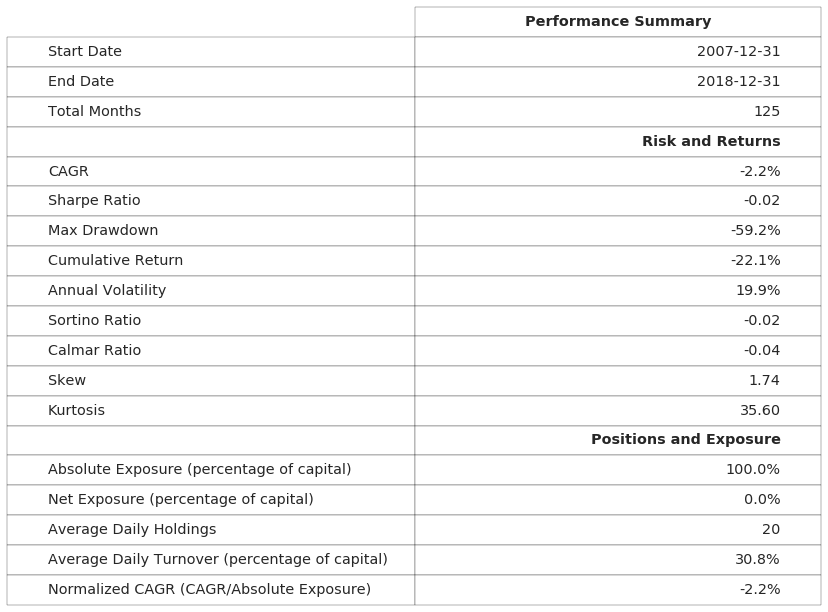

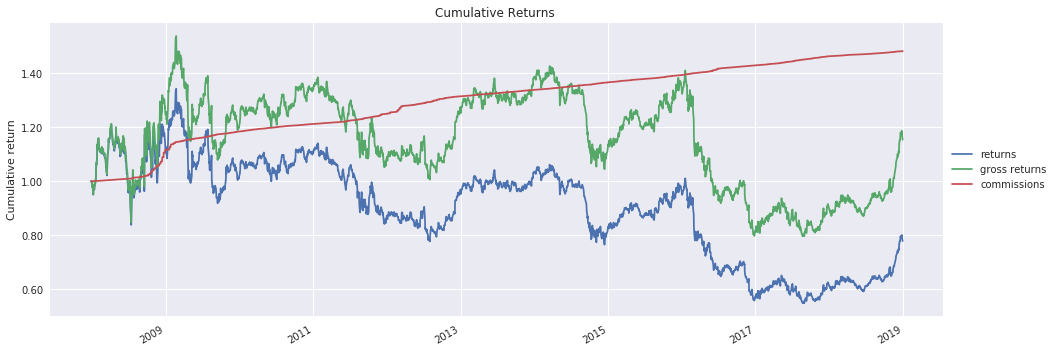

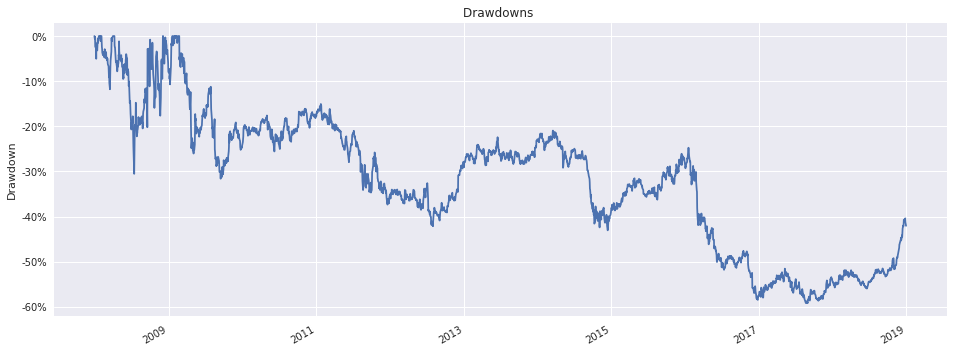

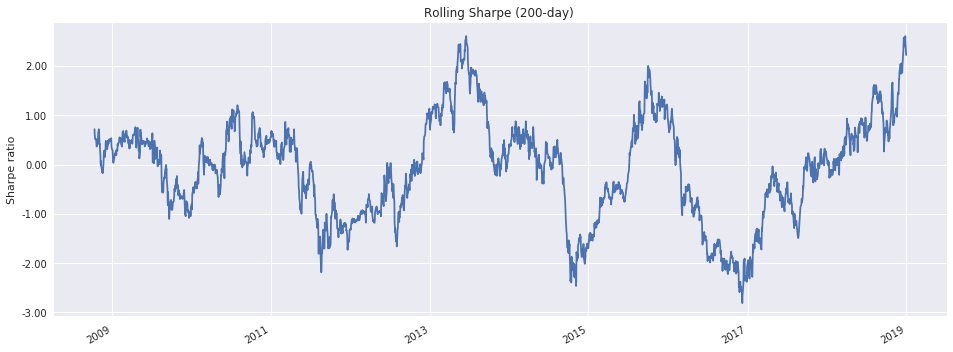

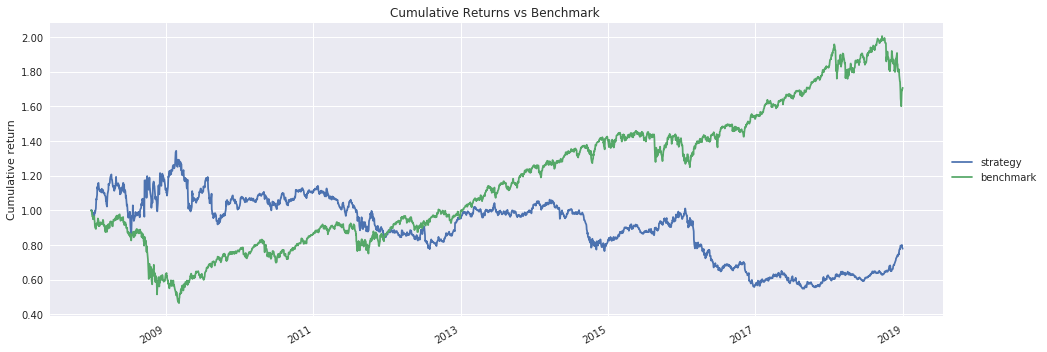

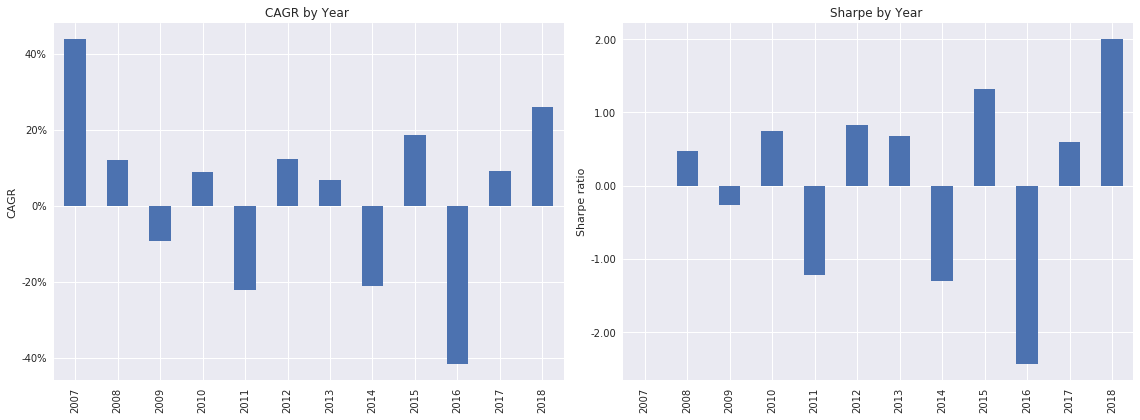

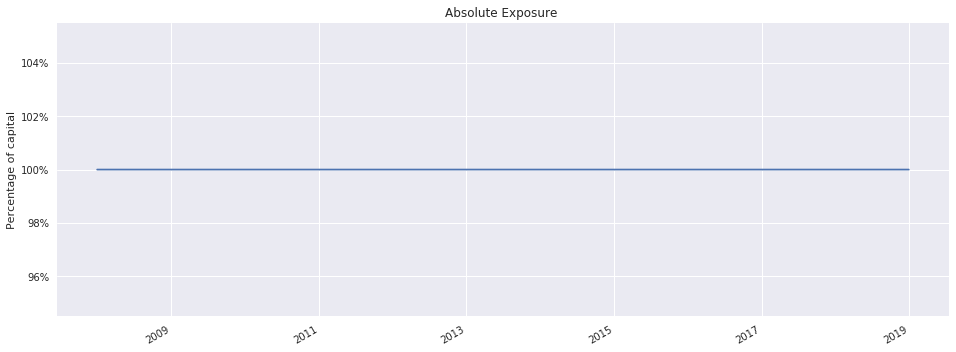

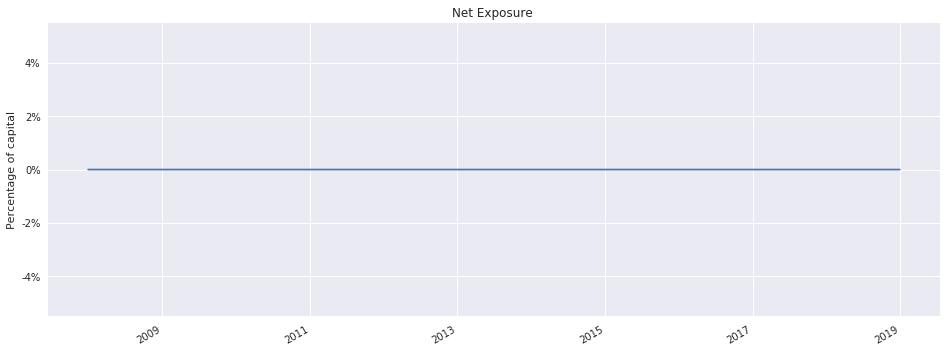

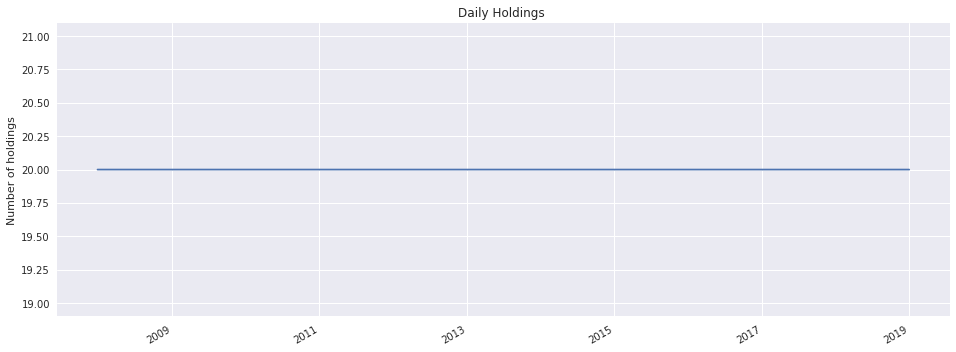

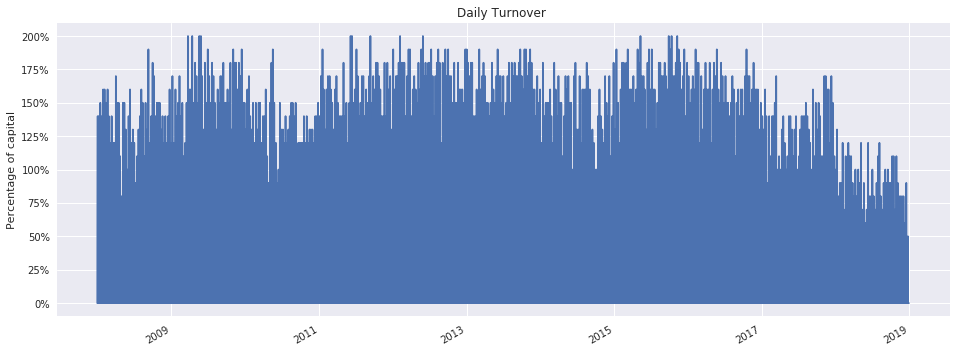

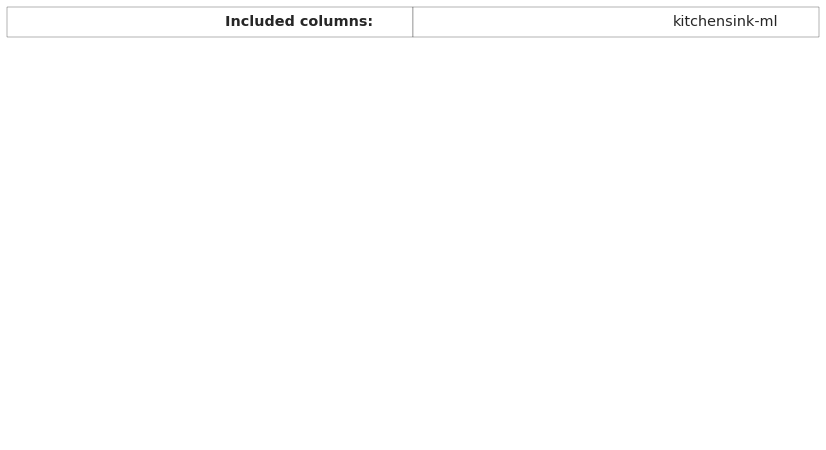

In [3]:
from moonchart import Tearsheet
Tearsheet.from_moonshot_csv("kitchensink_ml_pca_results.csv")

***

## *Next Up*

Part 6: [Analysis of Model Predictions](Part6-Predictions-Analysis.ipynb)